In [1]:
!wget -O dataset.7z https://data.mendeley.com/public-files/datasets/zkzghjvpn2/files/ef0ffb7d-2fbe-48b7-8d33-1f31a56f99fd/file_downloaded
!7z x dataset.7z
!sha256sum NewPPE25-3212/

--2025-02-15 19:59:41--  https://data.mendeley.com/public-files/datasets/zkzghjvpn2/files/ef0ffb7d-2fbe-48b7-8d33-1f31a56f99fd/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.133.86, 162.159.130.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.133.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/a3c8661d-6e8d-4853-ac23-934361d460e2 [following]
--2025-02-15 19:59:42--  https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/a3c8661d-6e8d-4853-ac23-934361d460e2
Resolving prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)... 3.5.71.106, 52.218.110.144, 3.5.67.17, ...
Connecting to prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)|3.5.71.106|:443... c

In [2]:
!pip install ultralytics
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 47.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from ultralytics import YOLO
from roboflow import Roboflow
from google.colab import drive


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
model = YOLO('yolov8n.pt')  # Load a pre-trained YOLOv8 nano model
dataset_path = 'data'


100%|██████████| 6.25M/6.25M [00:00<00:00, 100MB/s]


In [6]:
results = model.train(
    data=f'{dataset_path}/data.yaml',
    epochs=100,
    imgsz=640,
    batch=16,
    patience=20,
    name='construction_safety_model'
)


Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data/data.yaml, epochs=100, time=None, patience=20, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=construction_safety_model2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

100%|██████████| 755k/755k [00:00<00:00, 19.7MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 109MB/s]


AMP: checks passed ✅


train: Scanning /content/data/train/labels... 2570 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2570/2570 [00:03<00:00, 710.45it/s]


train: New cache created: /content/data/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/data/valid/labels... 642 images, 0 backgrounds, 0 corrupt: 100%|██████████| 642/642 [00:01<00:00, 564.82it/s]

val: New cache created: /content/data/valid/labels.cache


Plotting labels to runs/detect/construction_safety_model2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/construction_safety_model2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.28G      1.222      2.335      1.242         55        640: 100%|██████████| 161/161 [00:53<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.60it/s]


                   all        642       1752      0.594      0.678      0.656      0.432

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.19G      1.157      1.606      1.167         40        640: 100%|██████████| 161/161 [00:47<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.66it/s]


                   all        642       1752      0.586      0.639      0.632      0.409

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.22G      1.157      1.441      1.172         42        640: 100%|██████████| 161/161 [00:46<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.76it/s]


                   all        642       1752       0.61      0.699       0.66      0.426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.18G      1.168      1.354      1.172         54        640: 100%|██████████| 161/161 [00:46<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.78it/s]

                   all        642       1752      0.613      0.738      0.708      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.21G      1.139      1.261      1.154         51        640: 100%|██████████| 161/161 [00:46<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.82it/s]


                   all        642       1752      0.628      0.709      0.712      0.489

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.22G      1.108      1.179      1.143         40        640: 100%|██████████| 161/161 [00:46<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.74it/s]

                   all        642       1752      0.654      0.707      0.724      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.18G        1.1      1.133      1.132         44        640: 100%|██████████| 161/161 [00:46<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.71it/s]


                   all        642       1752      0.608      0.733      0.711      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.17G      1.095      1.112       1.13         46        640: 100%|██████████| 161/161 [00:47<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.33it/s]


                   all        642       1752      0.674      0.711      0.747      0.517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.21G      1.076      1.095      1.125         39        640: 100%|██████████| 161/161 [00:45<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.23it/s]

                   all        642       1752      0.694      0.748      0.777      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.21G      1.063      1.046      1.118         41        640: 100%|██████████| 161/161 [00:45<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.16it/s]

                   all        642       1752      0.714      0.744      0.779      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.19G      1.067      1.049      1.118         33        640: 100%|██████████| 161/161 [00:46<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.13it/s]

                   all        642       1752      0.718      0.736      0.774       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.19G      1.055      1.013      1.113         40        640: 100%|██████████| 161/161 [00:46<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.38it/s]

                   all        642       1752       0.67      0.756       0.76      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100       2.2G      1.033      1.001        1.1         49        640: 100%|██████████| 161/161 [00:47<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.64it/s]

                   all        642       1752      0.691      0.752      0.769      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.26G      1.031     0.9856      1.098         42        640: 100%|██████████| 161/161 [00:48<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.69it/s]

                   all        642       1752      0.699      0.763      0.769      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.26G      1.023     0.9654      1.102         28        640: 100%|██████████| 161/161 [00:47<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.83it/s]

                   all        642       1752      0.678       0.78      0.779      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.25G       1.02     0.9689      1.104         43        640: 100%|██████████| 161/161 [00:47<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.18it/s]

                   all        642       1752      0.701      0.747      0.786      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.21G      1.012     0.9627        1.1         52        640: 100%|██████████| 161/161 [00:45<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.23it/s]

                   all        642       1752      0.676      0.785      0.783      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.19G       1.02     0.9565      1.096         42        640: 100%|██████████| 161/161 [00:45<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.21it/s]

                   all        642       1752      0.689       0.77      0.777      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.19G       1.01     0.9292      1.089         37        640: 100%|██████████| 161/161 [00:45<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.16it/s]

                   all        642       1752      0.675      0.778      0.794      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100       2.2G      1.009     0.9466      1.095         45        640: 100%|██████████| 161/161 [00:45<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.30it/s]

                   all        642       1752       0.67      0.769      0.765      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.21G     0.9827      0.925      1.081         30        640: 100%|██████████| 161/161 [00:44<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.39it/s]

                   all        642       1752        0.7      0.784      0.795      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100       2.2G     0.9858     0.9117      1.081         27        640: 100%|██████████| 161/161 [00:45<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.37it/s]

                   all        642       1752      0.658      0.806       0.79      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.26G      0.968     0.8901      1.072         63        640: 100%|██████████| 161/161 [00:44<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.34it/s]

                   all        642       1752      0.707      0.797      0.799       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.28G     0.9748      0.866      1.077         61        640: 100%|██████████| 161/161 [00:44<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.32it/s]

                   all        642       1752      0.714      0.787      0.801      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.18G     0.9756     0.8854      1.072         25        640: 100%|██████████| 161/161 [00:45<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.23it/s]

                   all        642       1752      0.693      0.772      0.788      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.18G      0.983     0.8878       1.08         49        640: 100%|██████████| 161/161 [00:45<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.67it/s]

                   all        642       1752      0.721      0.777      0.813      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.18G     0.9727     0.8673      1.073         49        640: 100%|██████████| 161/161 [00:45<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.80it/s]

                   all        642       1752       0.68      0.795      0.802      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.19G     0.9757     0.8728      1.064         37        640: 100%|██████████| 161/161 [00:45<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.68it/s]

                   all        642       1752      0.734      0.767      0.815      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.18G     0.9567     0.8586      1.056         57        640: 100%|██████████| 161/161 [00:45<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.83it/s]

                   all        642       1752      0.734      0.759      0.818      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.19G     0.9708     0.8591      1.064         42        640: 100%|██████████| 161/161 [00:46<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.84it/s]

                   all        642       1752      0.703      0.797      0.802      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.21G      0.946     0.8481      1.058         41        640: 100%|██████████| 161/161 [00:46<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  4.03it/s]

                   all        642       1752      0.745      0.754      0.812      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100       2.2G     0.9505     0.8429      1.064         55        640: 100%|██████████| 161/161 [00:45<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.94it/s]

                   all        642       1752       0.71      0.766      0.801      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.21G     0.9421     0.8357      1.058         49        640: 100%|██████████| 161/161 [00:45<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.89it/s]

                   all        642       1752      0.698      0.793      0.807      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100       2.2G     0.9351     0.8219      1.055         30        640: 100%|██████████| 161/161 [00:45<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.93it/s]

                   all        642       1752      0.689      0.829      0.814      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.29G     0.9291     0.8142      1.055         46        640: 100%|██████████| 161/161 [00:46<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.92it/s]

                   all        642       1752      0.738      0.788      0.819      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.25G     0.9389     0.8079       1.05         48        640: 100%|██████████| 161/161 [00:45<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.81it/s]

                   all        642       1752      0.697      0.772      0.794      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.21G     0.9231     0.8029      1.049         38        640: 100%|██████████| 161/161 [00:45<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.95it/s]

                   all        642       1752      0.697      0.805      0.814      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.19G     0.9294      0.813      1.051         62        640: 100%|██████████| 161/161 [00:45<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.90it/s]

                   all        642       1752      0.733      0.791      0.812      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100       2.2G      0.919     0.7979      1.044         51        640: 100%|██████████| 161/161 [00:45<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  4.04it/s]

                   all        642       1752      0.709      0.799      0.818      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.27G     0.9223     0.7923      1.045         45        640: 100%|██████████| 161/161 [00:45<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.95it/s]

                   all        642       1752      0.755      0.778      0.828      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.21G     0.9098     0.7815      1.042         46        640: 100%|██████████| 161/161 [00:46<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.93it/s]

                   all        642       1752      0.734      0.799      0.828      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.18G     0.9157     0.7806      1.044         45        640: 100%|██████████| 161/161 [00:45<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.88it/s]

                   all        642       1752      0.717      0.817      0.831      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.21G     0.9193     0.7966      1.046         35        640: 100%|██████████| 161/161 [00:45<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.95it/s]

                   all        642       1752      0.705      0.805      0.818      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.19G     0.9021     0.7618      1.042         41        640: 100%|██████████| 161/161 [00:45<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.86it/s]

                   all        642       1752      0.732        0.8      0.824      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.21G     0.9011     0.7695      1.033         26        640: 100%|██████████| 161/161 [00:46<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.83it/s]

                   all        642       1752      0.749      0.779      0.822       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.19G     0.9019     0.7716      1.033         44        640: 100%|██████████| 161/161 [00:45<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.93it/s]

                   all        642       1752      0.723      0.802      0.827      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.21G     0.8847     0.7569      1.031         33        640: 100%|██████████| 161/161 [00:45<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.90it/s]

                   all        642       1752      0.721      0.793      0.831      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100       2.2G     0.8845     0.7696      1.028         48        640: 100%|██████████| 161/161 [00:45<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.90it/s]

                   all        642       1752      0.736      0.785       0.82       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.19G     0.8811      0.753      1.028         52        640: 100%|██████████| 161/161 [00:45<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.90it/s]

                   all        642       1752      0.759       0.78      0.826      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.19G     0.8825     0.7419      1.034         59        640: 100%|██████████| 161/161 [00:45<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.90it/s]

                   all        642       1752      0.739      0.776      0.826      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.18G     0.8807     0.7526      1.028         35        640: 100%|██████████| 161/161 [00:45<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.96it/s]

                   all        642       1752      0.716      0.805      0.826      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.19G     0.8811     0.7523      1.025         48        640: 100%|██████████| 161/161 [00:46<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.94it/s]

                   all        642       1752       0.77       0.75      0.828      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.18G     0.8741     0.7374      1.021         42        640: 100%|██████████| 161/161 [00:47<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.78it/s]

                   all        642       1752      0.715      0.813      0.828      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.19G     0.8679     0.7214      1.022         22        640: 100%|██████████| 161/161 [00:47<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.78it/s]

                   all        642       1752      0.722      0.808      0.827      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.18G     0.8658     0.7177      1.018         33        640: 100%|██████████| 161/161 [00:47<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.41it/s]

                   all        642       1752       0.73      0.796      0.831      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.17G     0.8659     0.7267       1.02         31        640: 100%|██████████| 161/161 [00:45<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.34it/s]

                   all        642       1752      0.745      0.787      0.831       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.19G     0.8671     0.7182      1.018         54        640: 100%|██████████| 161/161 [00:46<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.19it/s]

                   all        642       1752      0.732      0.795      0.826      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.21G     0.8727     0.7203      1.015         36        640: 100%|██████████| 161/161 [00:46<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.12it/s]

                   all        642       1752      0.705      0.787      0.814      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100       2.2G     0.8701     0.7186      1.017         46        640: 100%|██████████| 161/161 [00:45<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.22it/s]

                   all        642       1752      0.743      0.774      0.832      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.28G      0.853     0.7053      1.016         37        640: 100%|██████████| 161/161 [00:45<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.51it/s]

                   all        642       1752      0.733      0.808      0.831      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.21G     0.8418     0.7028      1.012         61        640: 100%|██████████| 161/161 [00:46<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.60it/s]

                   all        642       1752      0.728      0.795       0.83      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.19G     0.8501     0.6883       1.01         44        640: 100%|██████████| 161/161 [00:46<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.80it/s]

                   all        642       1752      0.734      0.797      0.827      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.21G     0.8416     0.6859      1.005         31        640: 100%|██████████| 161/161 [00:46<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.78it/s]

                   all        642       1752      0.714      0.809      0.829      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.19G     0.8398     0.6812      1.002         36        640: 100%|██████████| 161/161 [00:46<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.89it/s]

                   all        642       1752      0.735      0.781      0.828      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.21G     0.8307     0.6721     0.9978         35        640: 100%|██████████| 161/161 [00:46<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.76it/s]

                   all        642       1752      0.716      0.797      0.815      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.21G     0.8276     0.6619      1.005         35        640: 100%|██████████| 161/161 [00:46<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.81it/s]

                   all        642       1752      0.744      0.785      0.827       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.19G     0.8146     0.6644     0.9975         32        640: 100%|██████████| 161/161 [00:46<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.73it/s]

                   all        642       1752      0.738      0.761       0.82      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.17G      0.826     0.6687      0.997         40        640: 100%|██████████| 161/161 [00:45<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.82it/s]

                   all        642       1752      0.711      0.795      0.817      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.21G     0.8183      0.655     0.9962         62        640: 100%|██████████| 161/161 [00:45<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.75it/s]

                   all        642       1752      0.738      0.785      0.827      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.19G     0.8218     0.6614     0.9935         54        640: 100%|██████████| 161/161 [00:45<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.42it/s]

                   all        642       1752        0.7      0.828      0.829      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100       2.2G     0.8103     0.6434     0.9884         53        640: 100%|██████████| 161/161 [00:45<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.26it/s]

                   all        642       1752      0.751      0.775      0.828      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.25G     0.8213     0.6522      0.997         36        640: 100%|██████████| 161/161 [00:45<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.28it/s]

                   all        642       1752      0.721      0.808      0.828      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100       2.2G     0.8077      0.638     0.9907         37        640: 100%|██████████| 161/161 [00:44<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.26it/s]

                   all        642       1752      0.723      0.793      0.824      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.28G     0.8052     0.6474     0.9893         29        640: 100%|██████████| 161/161 [00:44<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.15it/s]

                   all        642       1752      0.724      0.806      0.826      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.28G     0.8059     0.6404     0.9879         25        640: 100%|██████████| 161/161 [00:44<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.25it/s]

                   all        642       1752      0.714      0.801      0.821      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.25G     0.8023      0.632       0.99         64        640: 100%|██████████| 161/161 [00:45<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.23it/s]

                   all        642       1752      0.738      0.801      0.824      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100       2.2G     0.7889     0.6226     0.9829         37        640: 100%|██████████| 161/161 [00:45<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.29it/s]

                   all        642       1752      0.722      0.799      0.825      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.26G     0.7935      0.617     0.9848         26        640: 100%|██████████| 161/161 [00:45<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.42it/s]

                   all        642       1752      0.737      0.783      0.827      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.26G     0.7922     0.6163     0.9819         37        640: 100%|██████████| 161/161 [00:45<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.58it/s]

                   all        642       1752      0.742      0.788      0.825      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.29G     0.7905     0.6159     0.9835         46        640: 100%|██████████| 161/161 [00:45<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.55it/s]

                   all        642       1752      0.745      0.774      0.827      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100       2.2G     0.7873     0.6138     0.9813         34        640: 100%|██████████| 161/161 [00:45<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.81it/s]

                   all        642       1752      0.739      0.795       0.83      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.26G     0.7811     0.6042      0.978         50        640: 100%|██████████| 161/161 [00:46<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.78it/s]

                   all        642       1752      0.726      0.798      0.822      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.26G     0.7742     0.5967     0.9761         35        640: 100%|██████████| 161/161 [00:46<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.88it/s]

                   all        642       1752      0.727      0.799      0.828      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.28G     0.7688     0.5895     0.9762         37        640: 100%|██████████| 161/161 [00:45<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.80it/s]

                   all        642       1752      0.731      0.786      0.823      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100       2.2G     0.7699     0.5863     0.9758         45        640: 100%|██████████| 161/161 [00:45<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.89it/s]

                   all        642       1752      0.742      0.771      0.819      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.28G     0.7613     0.5868     0.9727         52        640: 100%|██████████| 161/161 [00:46<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.89it/s]

                   all        642       1752      0.746      0.779      0.828      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.26G     0.7632     0.5814     0.9693         51        640: 100%|██████████| 161/161 [00:45<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.90it/s]

                   all        642       1752      0.744      0.778      0.823      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.25G     0.7638     0.5777     0.9689         27        640: 100%|██████████| 161/161 [00:46<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.69it/s]

                   all        642       1752      0.763      0.765      0.824      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.19G     0.7666     0.5795     0.9764         44        640: 100%|██████████| 161/161 [00:46<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.84it/s]

                   all        642       1752      0.747      0.764      0.817      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.16G     0.7686     0.5817     0.9769         53        640: 100%|██████████| 161/161 [00:45<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.76it/s]

                   all        642       1752      0.741      0.776      0.822      0.618


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.25G      0.708     0.4958     0.9334         27        640: 100%|██████████| 161/161 [00:46<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.98it/s]

                   all        642       1752      0.739      0.778      0.819      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.17G     0.6976     0.4795     0.9291         27        640: 100%|██████████| 161/161 [00:43<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.92it/s]

                   all        642       1752      0.746       0.76       0.82      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.19G     0.6964      0.473     0.9278         25        640: 100%|██████████| 161/161 [00:43<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.65it/s]

                   all        642       1752      0.753      0.761      0.819      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.16G     0.6952     0.4687     0.9222         36        640: 100%|██████████| 161/161 [00:43<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.27it/s]

                   all        642       1752      0.743      0.765      0.817      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.18G     0.6843     0.4601     0.9215         24        640: 100%|██████████| 161/161 [00:43<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.38it/s]

                   all        642       1752      0.751      0.756      0.815      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.17G     0.6872     0.4588     0.9256         24        640: 100%|██████████| 161/161 [00:42<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.20it/s]

                   all        642       1752      0.721      0.788      0.813      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.16G     0.6842      0.457     0.9253         24        640: 100%|██████████| 161/161 [00:42<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.77it/s]

                   all        642       1752      0.767      0.742      0.815      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.16G     0.6772     0.4483     0.9193         25        640: 100%|██████████| 161/161 [00:43<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.95it/s]

                   all        642       1752      0.737      0.769      0.814      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.16G     0.6791     0.4453     0.9217         20        640: 100%|██████████| 161/161 [00:44<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.79it/s]

                   all        642       1752       0.72      0.793      0.816      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.17G     0.6717     0.4451     0.9219         18        640: 100%|██████████| 161/161 [00:43<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.20it/s]

                   all        642       1752       0.72       0.79      0.814      0.614



100 epochs completed in 1.461 hours.
Optimizer stripped from runs/detect/construction_safety_model2/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/construction_safety_model2/weights/best.pt, 6.3MB

Validating runs/detect/construction_safety_model2/weights/best.pt...
Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.44it/s]


                   all        642       1752      0.739      0.792       0.83      0.624
                Helmet        358        597      0.646      0.774      0.766        0.6
              NoHelmet        240        454      0.793      0.837      0.886       0.69
                NoVest        209        306      0.669      0.701      0.744       0.52
                  Vest        220        395      0.847      0.857      0.924      0.685
Speed: 0.3ms preprocess, 2.3ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/construction_safety_model2


In [7]:
results = model.val()

Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/data/valid/labels.cache... 642 images, 0 backgrounds, 0 corrupt: 100%|██████████| 642/642 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:07<00:00,  5.50it/s]


                   all        642       1752      0.739      0.795       0.83      0.624
                Helmet        358        597      0.645      0.777      0.766      0.598
              NoHelmet        240        454      0.793      0.839      0.886      0.691
                NoVest        209        306       0.67      0.704      0.744       0.52
                  Vest        220        395      0.848      0.861      0.924      0.686
Speed: 0.9ms preprocess, 4.0ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/construction_safety_model22


In [8]:
model.save('construction_safety_model.pt')

In [9]:

# For image
results = model('data/valid/images/00044_jpg.rf.50e898ba54d24af0adc4ffd9a859a94c.jpg')

# For video




image 1/1 /content/data/valid/images/00044_jpg.rf.50e898ba54d24af0adc4ffd9a859a94c.jpg: 640x640 1 Helmet, 8.7ms
Speed: 3.0ms preprocess, 8.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


In [10]:
for r in results:
    print(r.boxes.data)  # Print bounding boxes
    print(r.boxes.cls)   # Print class indices
    print(r.boxes.conf)  # Print confidence scores

# Print class names
print(model.names)

# To get a more readable output of detected objects
for r in results:
    for box in r.boxes:
        x1, y1, x2, y2 = box.xyxy[0]
        class_id = int(box.cls[0])
        conf = float(box.conf[0])
        print(f"Detected {model.names[class_id]} with confidence {conf:.2f} at location {x1:.0f}, {y1:.0f}, {x2:.0f}, {y2:.0f}")

tensor([[2.2239e+02, 3.6935e-01, 3.9424e+02, 2.7476e+02, 8.9325e-01, 0.0000e+00]], device='cuda:0')
tensor([0.], device='cuda:0')
tensor([0.8933], device='cuda:0')
{0: 'Helmet', 1: 'NoHelmet', 2: 'NoVest', 3: 'Vest'}
Detected Helmet with confidence 0.89 at location 222, 0, 394, 275


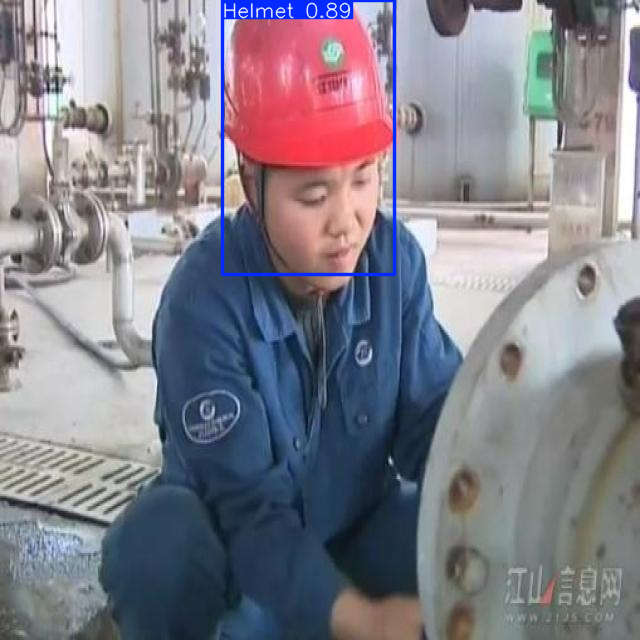

In [11]:
import cv2
from google.colab.patches import cv2_imshow

img = results[0].plot()

# Display the image
cv2_imshow(img)

In [13]:
!pip install detectron2

NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

In [12]:
import cv2
import glob
import os
from google.colab.patches import cv2_imshow
from detectron2.utils.visualizer import Visualizer, ColorMode

#Define paths
video_path = "Workers.mp4"
output_video_path = "output_video.mp4"
frames_dir = "Frames"

#Create output directory for frames
os.makedirs(frames_dir, exist_ok=True)

#Load the video
cap = cv2.VideoCapture(video_path)

frame_count = 0
frame_width = int(cap.get(3))  # Video width
frame_height = int(cap.get(4))  # Video height
fps = cap.get(cv2.CAP_PROP_FPS)  # Frames per second

#Process each frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break  # Stop if video ends

    # Run Detectron2 predictor
    outputs = predictor(frame)

    # Visualize predictions
    v = Visualizer(frame[:, :, ::-1], metadata=test_metadata, scale=0.8)
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

    # Save the processed frame
    frame_filename = f"{framesdir}/frame{frame_count:04d}.jpg"
    cv2.imwrite(frame_filename, out.get_image()[:, :, ::-1])

    frame_count += 1

cap.release()


ModuleNotFoundError: No module named 'detectron2'

In [14]:
results = model('Workers.mp4')



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/321) /content/Workers.mp4: 384x640 3 Helmets, 1 NoVest, 1 Vest, 37.6ms
video 1/1 (frame 2/321) /content/Workers.mp4: 384x640 3 Helmets, 1 NoVest, 1 Vest, 6.6ms
video 1/1 (frame 3/321) /content/Workers.mp4: 384x640 3 Helmets, 1 NoVest, 1 Vest, 15.9ms
video 1/1 (frame 4/321) /content/Workers.mp4: 384x640 3 Helmets, 1 NoVest, 1 Vest, 10.1ms
video 1/1 (frame 5/321) /content/Workers.mp4: 384x640 3 Helmets, 1 NoVest, 1 Vest, 12.7ms
video 1

In [15]:
for r in results:
    print(r.boxes.data)  # Print bounding boxes
    print(r.boxes.cls)   # Print class indices
    print(r.boxes.conf)  # Print confidence scores

# Print class names
print(model.names)

# To get a more readable output of detected objects
for r in results:
    for box in r.boxes:
        x1, y1, x2, y2 = box.xyxy[0]
        class_id = int(box.cls[0])
        conf = float(box.conf[0])
        print(f"Detected {model.names[class_id]} with confidence {conf:.2f} at location {x1:.0f}, {y1:.0f}, {x2:.0f}, {y2:.0f}")

tensor([[4.8795e+02, 1.3320e+02, 5.5685e+02, 2.5526e+02, 7.5346e-01, 2.0000e+00],
        [5.8943e+01, 1.7801e+02, 1.0980e+02, 2.2644e+02, 6.8862e-01, 0.0000e+00],
        [4.8796e+02, 7.7745e+01, 5.3506e+02, 1.2946e+02, 6.3487e-01, 0.0000e+00],
        [4.2695e+02, 1.0775e+02, 4.7237e+02, 1.6163e+02, 4.7083e-01, 0.0000e+00],
        [3.2890e+01, 2.3556e+02, 8.2100e+01, 3.5190e+02, 4.5473e-01, 3.0000e+00]], device='cuda:0')
tensor([2., 0., 0., 0., 3.], device='cuda:0')
tensor([0.7535, 0.6886, 0.6349, 0.4708, 0.4547], device='cuda:0')
tensor([[4.8795e+02, 1.3319e+02, 5.5685e+02, 2.5526e+02, 7.5322e-01, 2.0000e+00],
        [5.8942e+01, 1.7801e+02, 1.0981e+02, 2.2644e+02, 6.8856e-01, 0.0000e+00],
        [4.8796e+02, 7.7746e+01, 5.3506e+02, 1.2946e+02, 6.3497e-01, 0.0000e+00],
        [4.2695e+02, 1.0775e+02, 4.7237e+02, 1.6161e+02, 4.7074e-01, 0.0000e+00],
        [3.2890e+01, 2.3556e+02, 8.2097e+01, 3.5189e+02, 4.5471e-01, 3.0000e+00]], device='cuda:0')
tensor([2., 0., 0., 0., 3.], dev

In [18]:
from ultralytics import YOLO
import cv2

# Load the model
model = YOLO('yolov8n.pt')  # or your custom model path

# Open the video file
video_path = 'Workers.mp4'
cap = cv2.VideoCapture(video_path)

# Get video properties
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output_video.mp4', fourcc, fps, (width, height))

# Process video frames
while cap.isOpened():
    success, frame = cap.read()
    if not success:
        break

    # Run YOLOv8 inference on the frame
    results = model(frame)

    # Visualize the results on the frame
    annotated_frame = results[0].plot()

    # Write the frame into the output video file
    out.write(annotated_frame)

# Release the video capture and writer objects
cap.release()
out.release()

print("Video processing complete. Output saved as 'output_video.mp4'")



0: 384x640 4 persons, 78.6ms
Speed: 5.0ms preprocess, 78.6ms inference, 5.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 12.2ms
Speed: 5.4ms preprocess, 12.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 9.6ms
Speed: 3.0ms preprocess, 9.6ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 14.8ms
Speed: 3.3ms preprocess, 14.8ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 11.3ms
Speed: 3.5ms preprocess, 11.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 11.6ms
Speed: 3.2ms preprocess, 11.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 8.4ms
Speed: 3.6ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 10.1ms
Speed: 3.4ms preprocess, 10.1ms inference, 1.8ms postprocess per image at shape (1, 3